## STEP 1 : Download Dataset and Prepare Programming

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
#import shap ; shap.initjs()
#import logging

#log = logging.getLogger('shap')
#log.setLevel(logging.ERROR)

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

## STEP 2 : Select Methods

Clustering : Kmeans <br>
Classification : Random Forest

## STEP 3 : Import Dataset and Analysis Dataset

In [5]:
od=pd.read_csv('./data/data.csv', sep=',')
print(od.shape)
print(od.info())

(569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

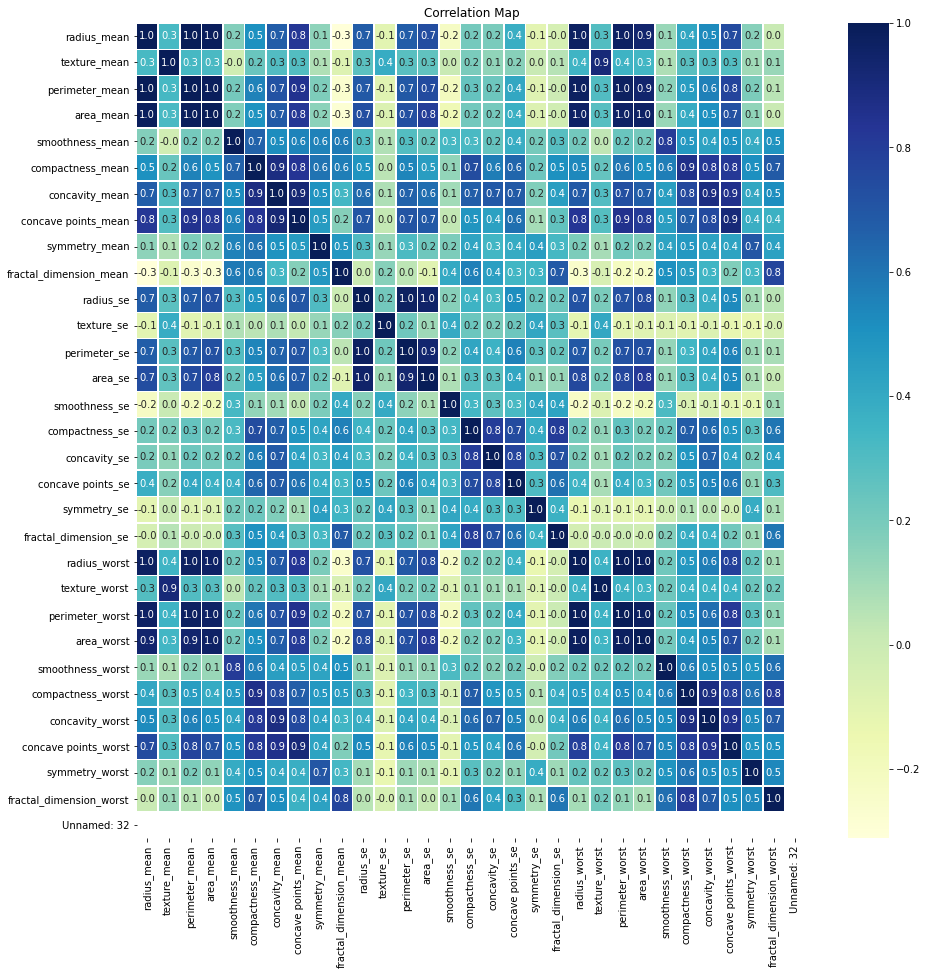

In [6]:
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(od.iloc[:,1:].corr(),annot= True,linewidths=0.5,fmt = ".1f", ax=ax, cmap="YlGnBu")
plt.title('Correlation Map')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [7]:
#first column is contains ill id 
#last column contain only nan value due to extra delimeter end of line
od = od.drop(od.columns[[0,32]],axis=1)

# M(malignant) = 0 and B(benign) = 1 enumeration for more accurty results 
od['diagnosis'] = od['diagnosis'].map({'M':0,'B':1})

# There is main 3 type info here, mean, standard error, and worst/largest mean values. I chose first one
# because these three are highly correlated
od = od.drop(od.columns[[i for i in range(11,31)]],axis=1)
print(od.shape)
print(od.info())

(569, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 49.0 KB
None


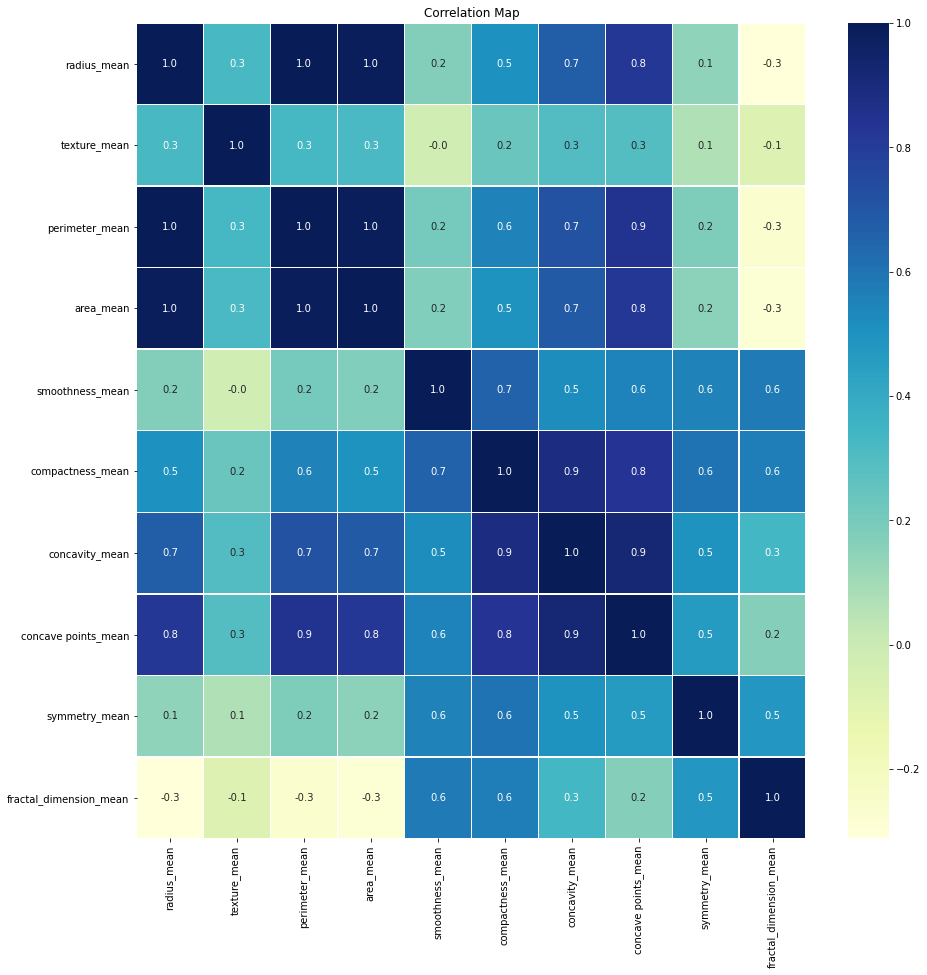

In [8]:
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(od.iloc[:,1:].corr(),annot= True,linewidths=0.5,fmt = ".1f", ax=ax, cmap="YlGnBu")
plt.title('Correlation Map')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
# plt.savefig('correlationMap_OD.png')
plt.show()

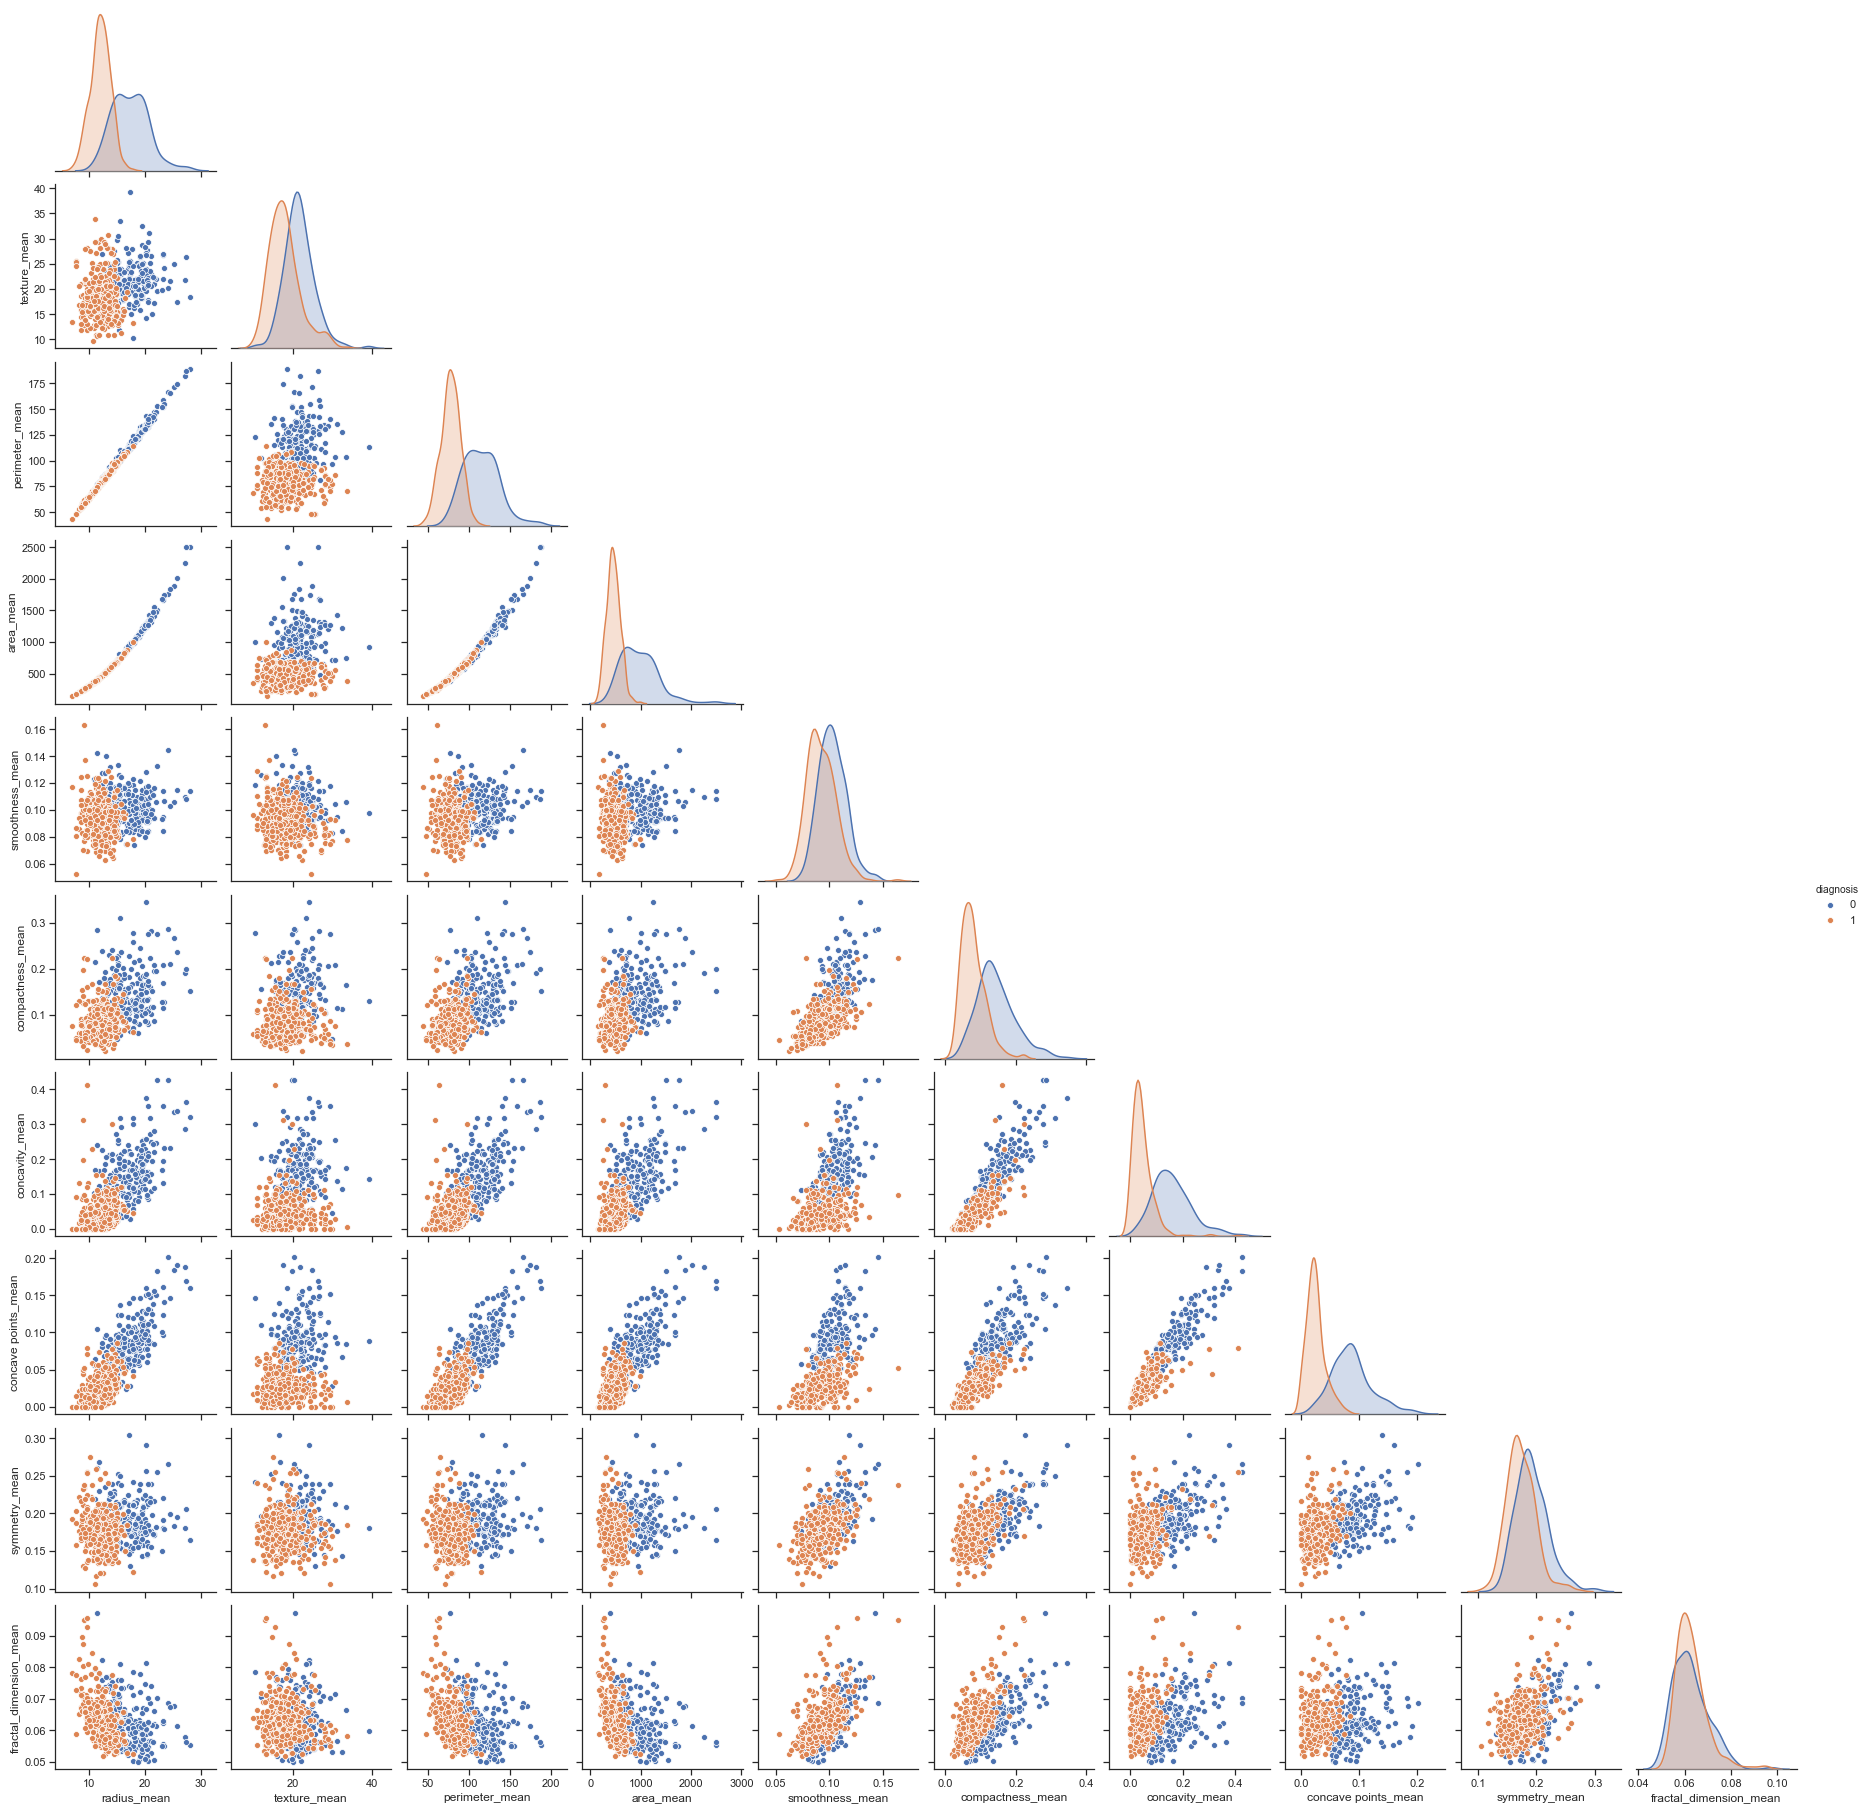

In [9]:
# Blue dots are malignant, reds are bening
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set(style="ticks", color_codes=True)
sns.pairplot(od, hue="diagnosis",corner=True)

In [10]:
high_correlated_features = ["radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean","concave points_mean"]
low_correlated_features = ["texture_mean","smoothness_mean","symmetry_mean","fractal_dimension_mean"]
mean_features = high_correlated_features + low_correlated_features
selected_features = ["concave points_mean"]+low_correlated_features

## STEP 5 : Cluster the Original Dataset

Text(0.5, 1.0, 'Original - KMeans clustering plot - All Mean Features')

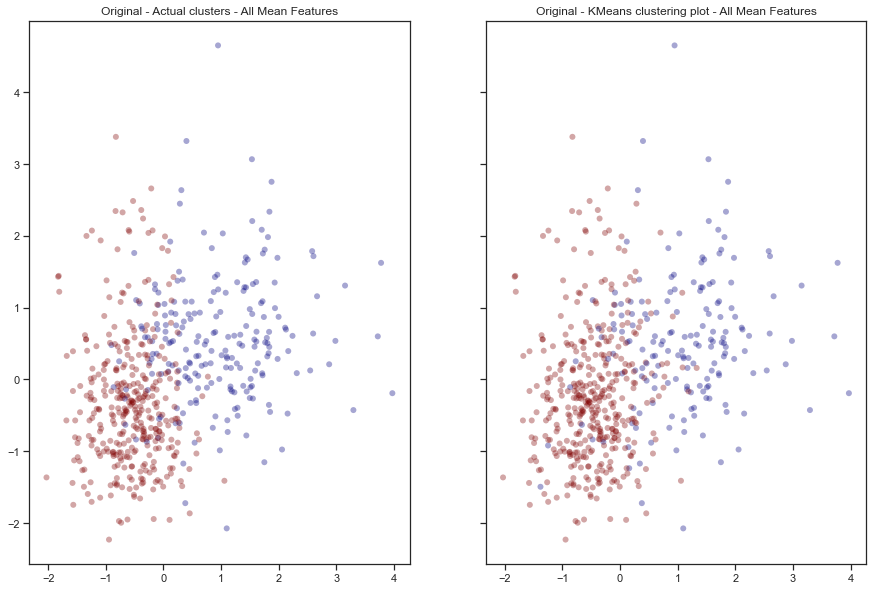

In [11]:
# ALL FEATURES
X = od.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
km_pred = km.fit_predict(X)

# Scatter plots  https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10), sharey=True)

ax1.scatter(X[:,0], X[:,1], c=od["diagnosis"], cmap="jet",edgecolor="none", alpha=0.35)
ax1.set_title("Original - Actual clusters - All Mean Features")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="none", alpha=0.35)
ax2.set_title("Original - KMeans clustering plot - All Mean Features")

Text(0.5, 1.0, 'Original - KMeans clustering plot - Low Correlated Mean Features')

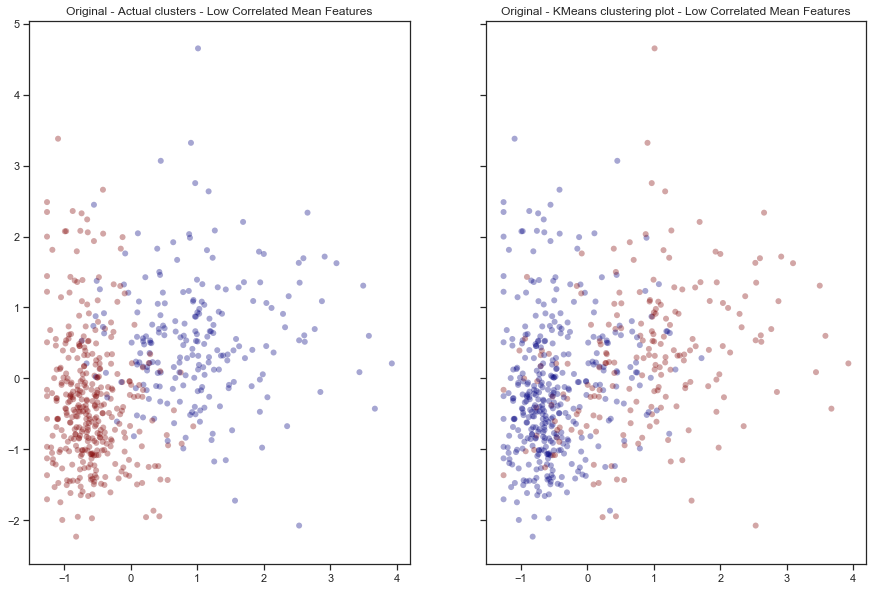

In [10]:
# SELECTED FEATURES CLUSTER
X = StandardScaler().fit_transform(od[selected_features].values)
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
km_pred = km.fit_predict(X)
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10), sharey=True)
ax1.scatter(X[:,0], X[:,1], c=od["diagnosis"], cmap="jet",edgecolor="none", alpha=0.35)
ax1.set_title("Original - Actual clusters - Low Correlated Mean Features")
ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="none", alpha=0.35)
ax2.set_title("Original - KMeans clustering plot - Low Correlated Mean Features")

## STEP 7 : Present Clustered Dataset

I explained this part in the report at cluster section.

## STEP 8 : Split the Normalized and Original Dataset

In [11]:
# Original Dataset
msk = np.random.rand(len(od)) < 0.80
train_od = od[msk]
test_od = od[~msk]
print("Original train shape:",train_od.shape)
print("Original test shape:",test_od.shape)

Original train shape: (464, 11)
Original test shape: (105, 11)


## STEP 4 : Normalize the Dataset

In [12]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns[1:]:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [13]:
# Normalized Dataset
train_nd = normalize(train_od)
test_nd = normalize(test_od)
print("Normalized train shape:",train_nd.shape)
print("Normalized test shape:",test_nd.shape)
test_nd.head()

Normalized train shape: (464, 11)
Normalized test shape: (105, 11)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
11,0,0.461464,0.349206,0.448685,0.357578,0.420854,0.410818,0.233224,0.328330,0.377011,0.204328
12,0,0.654858,0.787937,0.682527,0.557859,0.424504,0.847000,0.483833,0.555666,0.802299,0.595672
24,0,0.511096,0.570794,0.500650,0.429960,0.603358,0.472542,0.357310,0.455765,0.494253,0.260820
26,0,0.393006,0.580317,0.398425,0.277817,0.521840,0.626291,0.333880,0.436531,0.691188,0.396128
27,0,0.622911,0.499048,0.598896,0.540876,0.388003,0.326276,0.349110,0.384245,0.265900,0.117084


## STEP 6 : Cluster the Normalized Dataset

Text(0.5, 1.0, 'Normalized Train - KMeans clustering plot - All Mean Features')

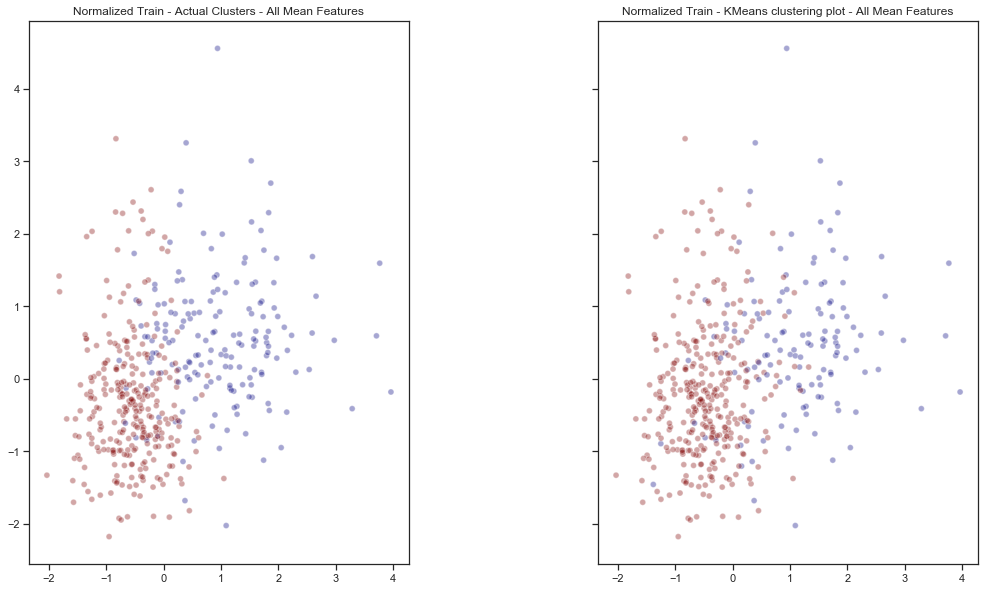

In [14]:
# ALL FEATURES TRAIN
X = train_nd.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
km_pred = km.fit_predict(X)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,10), sharey=True)
plt.subplots_adjust(wspace=0.5)
ax1.scatter(X[:,0], X[:,1], c=train_nd["diagnosis"], cmap="jet", edgecolor="white", alpha=0.35)
ax1.set_title("Normalized Train - Actual Clusters - All Mean Features")
ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="white", alpha=0.35)
ax2.set_title("Normalized Train - KMeans clustering plot - All Mean Features")

Text(0.5, 1.0, 'Normalized Test - KMeans clustering plot - All Mean Features')

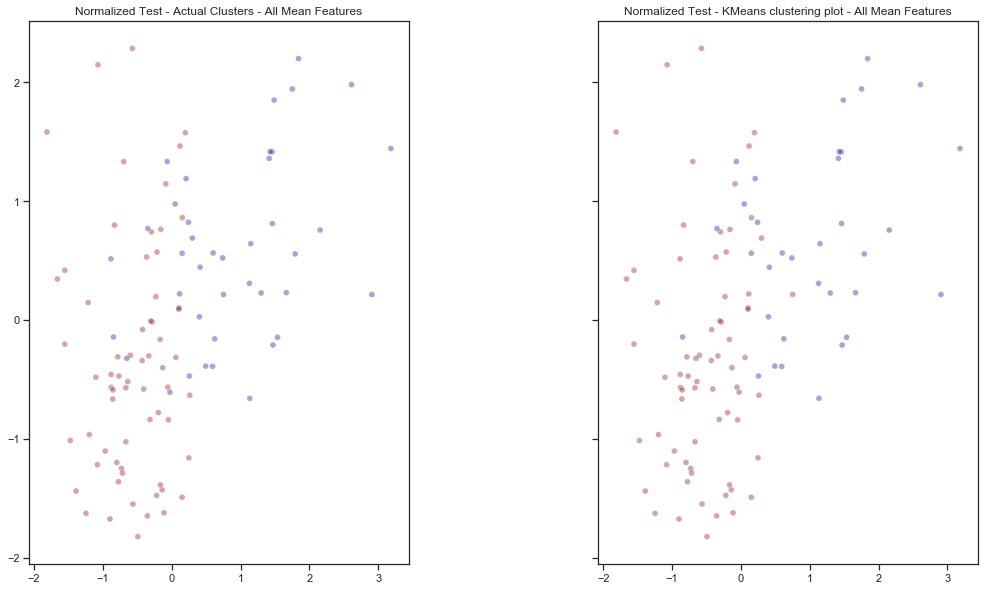

In [15]:
# ALL FEATURES TEST
X = test_nd.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
km_pred = km.fit_predict(X)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,10), sharey=True)
plt.subplots_adjust(wspace=0.5)
ax1.scatter(X[:,0], X[:,1], c=test_nd["diagnosis"], cmap="jet", edgecolor="white", alpha=0.35)
ax1.set_title("Normalized Test - Actual Clusters - All Mean Features")
ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="white", alpha=0.35)
ax2.set_title("Normalized Test - KMeans clustering plot - All Mean Features")

Text(0.5, 1.0, 'Normalized TRAIN  - KMeans clustering plot - Low Correlated Mean Features')

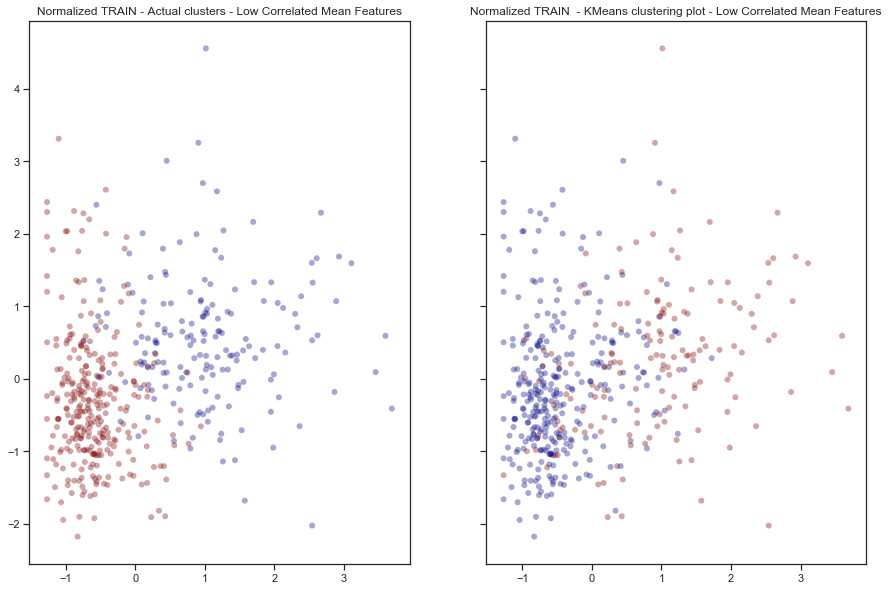

In [16]:
# SELECTED FEATURES TRAIN CLUSTERs
X = StandardScaler().fit_transform(train_nd[selected_features].values)
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
km_pred = km.fit_predict(X)
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10), sharey=True)
ax1.scatter(X[:,0], X[:,1], c=train_nd["diagnosis"], cmap="jet",edgecolor="none", alpha=0.35)
ax1.set_title("Normalized TRAIN - Actual clusters - Low Correlated Mean Features")
ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="none", alpha=0.35)
ax2.set_title("Normalized TRAIN  - KMeans clustering plot - Low Correlated Mean Features")

Text(0.5, 1.0, 'Normalized TEST  - KMeans clustering plot - Low Correlated Mean Features')

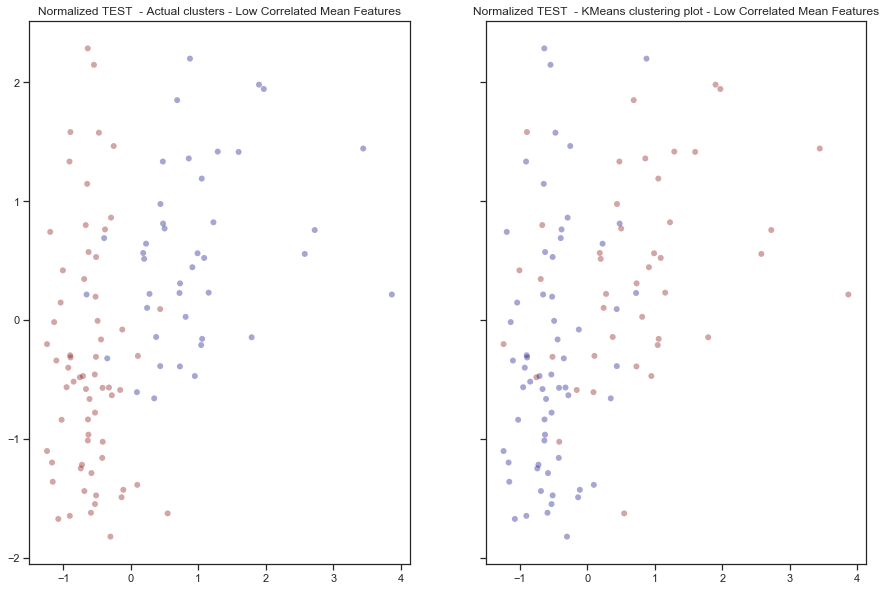

In [17]:
# SELECTED FEATURES TEST CLUSTERs
X = StandardScaler().fit_transform(test_nd[selected_features].values)
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
km_pred = km.fit_predict(X)
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10), sharey=True)
ax1.scatter(X[:,0], X[:,1], c=test_nd["diagnosis"], cmap="jet",edgecolor="none", alpha=0.35)
ax1.set_title("Normalized TEST  - Actual clusters - Low Correlated Mean Features")
ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="none", alpha=0.35)
ax2.set_title("Normalized TEST  - KMeans clustering plot - Low Correlated Mean Features")

## STEP 9.1 : Classify the Original Dataset
## STEP 10 : Use Scatter Plots to show Relations between  features cluster/classes

In [89]:
model = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=42)

In [90]:
train_X = train_od[mean_features]# taking the training data input 
train_y = train_od.diagnosis# This is output of our training data
# same we have to do for test
test_X = test_od[mean_features] # taking test data inputs
test_y = test_od.diagnosis   #output value of test dat

model.fit(train_X,train_y) #train model
#Check precision, recall, f1-score
print( classification_report(test_y, model.predict(test_X)) )
#Another way to get the models accuracy on the test data
print( 'accuracy_score : ', accuracy_score(test_y, model.predict(test_X)))
# Precision = TP / (TP+FP)
# Recall = TP / (TP+FN)
# f1 = 2*Precision*Recall / (Precision+Recall)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        47
           1       0.95      0.91      0.93        68

    accuracy                           0.92       115
   macro avg       0.92      0.92      0.92       115
weighted avg       0.92      0.92      0.92       115

accuracy_score :  0.9217391304347826


In [91]:
explainer = shap.KernelExplainer(model.predict_proba, train_X)
shap_values = explainer.shap_values(test_X)
shap.force_plot(explainer.expected_value[0], shap_values[0], test_X)

Using 454 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


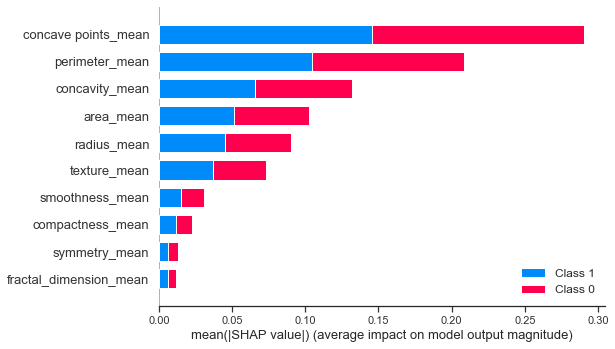

In [92]:
shap.summary_plot(shap_values, train_X+test_X)

In [93]:
model = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=42)

In [94]:
train_X = train_od[selected_features]# taking the training data input 
train_y = train_od.diagnosis# This is output of our training data
# same we have to do for test
test_X = test_od[selected_features] # taking test data inputs
test_y = test_od.diagnosis   #output value of test dat

model.fit(train_X,train_y) #train model
#Check precision, recall, f1-score
print( classification_report(test_y, model.predict(test_X)) )
#Another way to get the models accuracy on the test data
print( 'accuracy_score : ', accuracy_score(test_y, model.predict(test_X)))
# Precision = TP / (TP+FP)
# Recall = TP / (TP+FN)
# f1 = 2*Precision*Recall / (Precision+Recall)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        68

    accuracy                           0.97       115
   macro avg       0.97      0.96      0.96       115
weighted avg       0.97      0.97      0.97       115

accuracy_score :  0.9652173913043478


In [95]:
explainer = shap.KernelExplainer(model.predict_proba, train_X)
shap_values = explainer.shap_values(test_X)
shap.force_plot(explainer.expected_value[0], shap_values[0], test_X)

Using 454 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


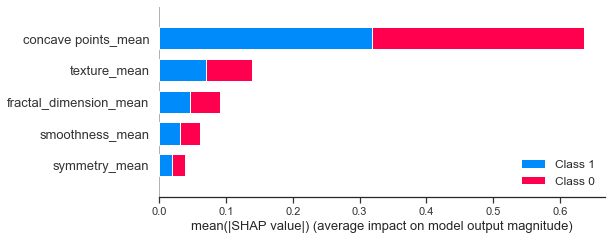

In [96]:
shap.summary_plot(shap_values, train_X+test_X)

## STEP 9.2 : Classify the Normalized Dataset

In [59]:
model = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=42)

In [97]:
train_X = train_nd[mean_features]# taking the training data input 
train_y = train_nd.diagnosis# This is output of our training data
# same we have to do for test
test_X = test_nd[mean_features] # taking test data inputs
test_y = test_nd.diagnosis   #output value of test dat

model.fit(train_X,train_y) #train model
#Check precision, recall, f1-score
print( classification_report(test_y, model.predict(test_X)) )
#Another way to get the models accuracy on the test data
print( 'accuracy_score : ', accuracy_score(test_y, model.predict(test_X)))
# Precision = TP / (TP+FP)
# Recall = TP / (TP+FN)
# f1 = 2*Precision*Recall / (Precision+Recall)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.95      0.90      0.92        68

    accuracy                           0.91       115
   macro avg       0.91      0.92      0.91       115
weighted avg       0.92      0.91      0.91       115

accuracy_score :  0.9130434782608695


In [98]:
explainer = shap.KernelExplainer(model.predict_proba, train_X)
shap_values = explainer.shap_values(test_X)
shap.force_plot(explainer.expected_value[0], shap_values[0], test_X)

Using 454 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


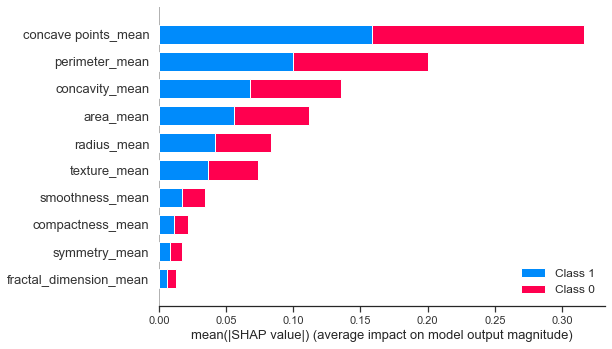

In [99]:
shap.summary_plot(shap_values, train_X+test_X)

In [100]:
model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)

In [101]:
train_X = train_nd[selected_features]# taking the training data input 
train_y = train_nd.diagnosis# This is output of our training data
# same we have to do for test
test_X = test_nd[selected_features] # taking test data inputs
test_y = test_nd.diagnosis   #output value of test dat

model.fit(train_X,train_y) #train model
#Check precision, recall, f1-score
print( classification_report(test_y, model.predict(test_X)) )
#Another way to get the models accuracy on the test data
print( 'accuracy_score : ', accuracy_score(test_y, model.predict(test_X)))
# Precision = TP / (TP+FP)
# Recall = TP / (TP+FN)
# f1 = 2*Precision*Recall / (Precision+Recall)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        47
           1       0.94      0.97      0.96        68

    accuracy                           0.95       115
   macro avg       0.95      0.94      0.95       115
weighted avg       0.95      0.95      0.95       115

accuracy_score :  0.9478260869565217


In [102]:
explainer = shap.KernelExplainer(model.predict_proba, train_X)
shap_values = explainer.shap_values(test_X)
shap.force_plot(explainer.expected_value[0], shap_values[0], test_X)

Using 454 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [ ]:
shap.summary_plot(shap_values, train_X+test_X)